In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from pathlib import Path
import cv2
import os
import warnings
import pandas as pd
from collections import deque


In [10]:
# hyperparameters
batch_size = 32
lr = 0.0001
imgSize = 150
epochs = 10
numTrainSamples = 1000  # Change later on
numValSamples = 100  # Change later on

In [1]:
data_dir = Path("kaggle/input/pneumonia-xray-images")
train = data_dir / "train"
val = data_dir / "val"
test = data_dir / "test"

normal = train / "NORMAL"
pneumonia = train / "PNEUMONIA"


# normalFreq = sum(1 for _ in normal.glob("*.jpeg"))
# pneumoniaFreq = sum(1 for _ in pneumonia.glob("*.jpeg"))

# numTrainSamples = normalFreq + pneumoniaFreq


# labels = pd.Series([*[0]*normalFreq, *[1]*pneumoniaFreq])

# sns.set()
# fig, ax = plt.subplots(1, figsize=(10,6))
# vc = labels.value_counts(normalize=True)
# # labels
# count = sns.countplot(x=labels, edgecolor="black", ax=ax)
# count.set_title("Label Distribution(After generation)")

# plt.savefig("out/output.jpg")

[]
['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0128-0001.jpeg', 'IM-0129-0001.jpeg', 'IM-0131-0001.jpeg', 'IM-0133-0001.jpeg', 'IM-0135-0001.jpeg', 'IM-0137-0001.jpeg', 'IM-0140-0001.jpeg', 'IM-0141-0001.jpeg', 'IM-0143-0001.jpeg', 'IM-0145-0001.jpeg', 'IM-0147-0001.jpeg', 'IM-0149-0001.jpeg', 'IM-0151-0001.jpeg', 'IM-0152-0001.jpeg', 'IM-0154-0001.jpeg', 'IM-0156-0001.jpeg', 'IM-0158-0001.jpeg', 'IM-0160-0001.jpeg', 'IM-0162-0001.jpeg', 'IM-0164-0001.jpeg', 'IM-0166-0001.jpeg', 'IM-0168-0001.jpeg', 'IM-0170-0001.jpeg', 'IM-0172-0001.jpeg', 'IM-0176-0001.jpeg', 'IM-0177-0001.jpeg', 'IM-0178-0001.jpeg', 'IM-0180-0001.jpeg', 'IM-0182-0001.jpeg', 'IM-0183-0001.jpeg', 'IM-0185-0001.jpeg', 'IM-0187-0001.jpeg', 'IM-0189-0001.jpeg', 'IM-0191-0001.jpeg', 'IM-0193-0001.jpeg', 'IM-0195-0001.jpeg', 'IM-0199-0001.jpeg', 'IM-0201-0001.jpeg', 'IM-0203-0001.jpeg', 'IM-0205-0001.jpeg', 'IM-0206-0001.jpeg', 'IM-0207-

In [12]:

# Creating an ImageGenerator

data_gen = ImageDataGenerator(rescale=1./255,   # Rescale from 0-255 to 0-1
                                   rotation_range=30,  # rondomly rotate training iamges by 30
                                   width_shift_range=0.1,  # randomly shift images horizontally by 10% of width
                                   height_shift_range=0.1,   # randomly shift images horizontally by 10% of height
                                   zoom_range=0.2,  # Randomly zoom in/out 20% into image
                                   horizontal_flip=True)  # Randomly flip image horizontally


test_datagen = ImageDataGenerator(rescale=1./255)

training_gen = data_gen.flow_from_directory(train, target_size=(imgSize, imgSize), batch_size=batch_size, class_mode="binary")
validation_gen = data_gen.flow_from_directory(val, target_size=(imgSize, imgSize), batch_size=batch_size, class_mode="binary")

# # Visualizing the outputs of the generators

# fig, axs = plt.subplots(1,4, figsize=(10,3))
# fig.suptitle("Generated Training Images")
# generated = next(training_gen)
# images = generated[0]
# for i, ax in enumerate(axs):
#     ax.imshow(images[i])
#     ax.axis('off')
    
    
    


Found 624 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


0    0.38125
1    0.61875
dtype: float64

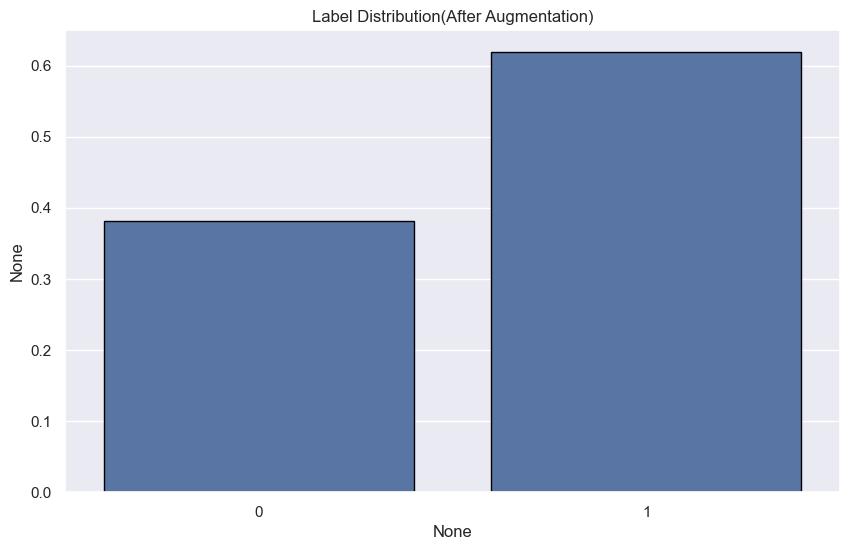

In [13]:

# total = pd.Series([0,0])

# for i in range(5):
#     generated = next(training_gen)
#     labels = np.array(generated[1]).astype(int) 
#     total += np.array(pd.Series(labels).value_counts(normalize=True, sort=False).sort_values())
    
# total /= 5
# sns.set()
# fig, ax = plt.subplots(1, figsize=(10,6))
# count = sns.barplot(x=total.index, y=total, edgecolor = "black", ax=ax)
# count.set_title("Label Distribution(After Augmentation)")
# plt.savefig("out/output-after-augmentation.jpg")
# total

In [14]:
# class_weights = class_weight.compute_class_weight('balanced', np.unique(train_generator.classes), train_generator.classes)


In [16]:
model.fit(training_gen, validation_data=validation_gen,epochs=5, batch_size=batch_size)

Epoch 1/5
20/20 [==============================] - 36s 2s/step - loss: 0.6614 - accuracy: 0.6282 - val_loss: 0.6651 - val_accuracy: 0.8019
Epoch 2/5
20/20 [==============================] - 37s 2s/step - loss: 0.6576 - accuracy: 0.6394 - val_loss: 0.5855 - val_accuracy: 0.7692
Epoch 3/5
20/20 [==============================] - 37s 2s/step - loss: 0.6134 - accuracy: 0.6731 - val_loss: 0.5267 - val_accuracy: 0.8212
Epoch 4/5
20/20 [==============================] - 38s 2s/step - loss: 0.5572 - accuracy: 0.7372 - val_loss: 0.5880 - val_accuracy: 0.6471
Epoch 5/5
20/20 [==============================] - 37s 2s/step - loss: 0.5515 - accuracy: 0.7388 - val_loss: 0.3925 - val_accuracy: 0.8394
